# ECIS 2023: Why Can't ERP System Use be Fun?
## Data Analyses 

&copy; Anika Nissen

In [1]:
R.home()

[1] "/Users/anikanissen/opt/anaconda3/envs/FIFUanalysis/lib/R"

### 1. Load necessary libraries

In [2]:
library(ggplot2)
library(plyr)
library(tidyr)
library(psych)
library(ggthemes)
library(nlme)
library(ggpubr)


Attache Paket: ‘psych’


Die folgenden Objekte sind maskiert von ‘package:ggplot2’:

    %+%, alpha



Attache Paket: ‘ggpubr’


Das folgende Objekt ist maskiert ‘package:plyr’:

    mutate




In [3]:
# num parallel processes. Should be less than the number of threads supported by your CPU
num_cores = 8

options("scipen"=100, "digits"=5)  # force decimal instead of scientific notation

### 2. Load in the data from the questionnaire and take a look at data

In [4]:
data_df <- get(load("./DataimportinR.RData"))
head(data_df)

,Antwort ID,SAPSUS1,SAPSUS2R,SAPSUS2,SAPSUS3,SAPSUS4R,SAPSUS4,SAPSUS5,SAPSUS6R,SAPSUS6,⋯,HarmonyOS,SonstigeOS,SAPSUS,SAPUEQ,OracleSUS,OracleUEQ,MicrosoftSUS,MicrosoftUEQ,SalesforceSUS,SalesforceUEQ
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,7,1,7,7,1,7,6,1,7,⋯,Nein,NA,6.7,6.250,5.4,3.750,4.2,3.750,5.8,5.875
2,2,3,2,6,5,1,7,3,1,7,⋯,Nein,NA,4.6,2.375,4.3,4.000,6.7,4.750,6.3,5.250
3,3,4,4,4,4,5,3,5,4,4,⋯,Nein,NA,3.8,3.625,3.7,3.875,4.0,3.625,4.3,3.625
4,4,6,2,6,5,3,5,6,2,6,⋯,Nein,NA,5.1,5.250,3.7,3.625,5.1,5.000,3.3,4.500
5,6,4,7,1,1,5,3,2,5,3,⋯,Nein,NA,2.3,2.000,5.3,3.750,5.9,5.500,4.8,5.125
6,7,4,6,2,2,6,2,3,3,5,⋯,Nein,NA,2.9,3.000,3.2,3.250,2.9,3.625,5.3,4.750


In [5]:
describe(data_df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Antwort ID,1,109,56.1193,31.9017,56,56.0787,40.0302,1,111,110,0.010866,-1.21343,3.05563
SAPSUS1,2,109,4.6147,1.5390,5,4.6404,1.4826,2,7,5,-0.055490,-1.04479,0.14741
SAPSUS2R,3,109,3.3211,1.5863,3,3.2472,1.4826,1,7,6,0.311671,-0.77510,0.15194
SAPSUS2,4,109,4.6789,1.5863,5,4.7528,1.4826,1,7,6,-0.311671,-0.77510,0.15194
SAPSUS3,5,109,4.0917,1.5726,4,4.0337,1.4826,1,7,6,0.133068,-0.77710,0.15063
SAPSUS4R,6,109,3.8257,1.8300,4,3.7865,1.4826,1,7,6,0.093884,-1.07059,0.17528
SAPSUS4,7,109,4.1743,1.8300,4,4.2135,1.4826,1,7,6,-0.093884,-1.07059,0.17528
SAPSUS5,8,109,4.6330,1.4824,5,4.6854,1.4826,1,7,6,-0.291060,-0.82914,0.14199
SAPSUS6R,9,109,3.2294,1.4696,3,3.1461,1.4826,1,7,6,0.471629,-0.18506,0.14077


### 3. Get the Summary for the Demographics Columns

In [6]:
summary(data_df[c("Age", "Gender", "Fach", "FamSAP", "FamOracle", "FamMicrosoft", "FamSalesforce")])

      Age            Gender  
 Min.   :18.0   Männlich:82  
 1st Qu.:19.0   Weiblich:27  
 Median :21.0                
 Mean   :21.8                
 3rd Qu.:23.0                
 Max.   :41.0                
                                              Fach        FamSAP    
 Angewandte Informatik/ Systems Engineering     :23   Min.   :1.00  
 Betriebswirtschaftslehre                       :44   1st Qu.:1.00  
 Lehramt                                        : 3   Median :1.00  
 Volkswirtschaftslehre                          : 1   Mean   :1.65  
 Wirtschaftsinformatik                          :24   3rd Qu.:2.00  
 Angewandte Informatik/ Systems\r\n  Engineering:14   Max.   :6.00  
   FamOracle     FamMicrosoft  FamSalesforce 
 Min.   :1.00   Min.   :1.00   Min.   :1.00  
 1st Qu.:1.00   1st Qu.:1.00   1st Qu.:1.00  
 Median :1.00   Median :1.00   Median :1.00  
 Mean   :1.14   Mean   :1.72   Mean   :1.27  
 3rd Qu.:1.00   3rd Qu.:2.00   3rd Qu.:1.00  
 Max.   :3.00   Max.   :7.00   

In [7]:
count(data_df, 'Gender')

Gender,freq
<fct>,<int>
Männlich,82
Weiblich,27


In [8]:
count(data_df, 'Fach') #Eng.: Fach = Field of Studies

Fach,freq
<fct>,<int>
Angewandte Informatik/ Systems Engineering,23
Betriebswirtschaftslehre,44
Lehramt,3
Volkswirtschaftslehre,1
Wirtschaftsinformatik,24
Angewandte Informatik/ Systems Engineering,14


### 4. Take a look at the main measured constructs (Visualization)

In [10]:
# First create long table out of wide table for the required cols
df <- data_df[c(1, 109:116)]
head(df)

,Antwort ID,SAPSUS,SAPUEQ,OracleSUS,OracleUEQ,MicrosoftSUS,MicrosoftUEQ,SalesforceSUS,SalesforceUEQ
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,6.7,6.250,5.4,3.750,4.2,3.750,5.8,5.875
2,2,4.6,2.375,4.3,4.000,6.7,4.750,6.3,5.250
3,3,3.8,3.625,3.7,3.875,4.0,3.625,4.3,3.625
4,4,5.1,5.250,3.7,3.625,5.1,5.000,3.3,4.500
5,6,2.3,2.000,5.3,3.750,5.9,5.500,4.8,5.125
6,7,2.9,3.000,3.2,3.250,2.9,3.625,5.3,4.750


In [11]:
dfUX.long <- pivot_longer(df, 
                          cols=c("SAPUEQ", "OracleUEQ", "MicrosoftUEQ", "SalesforceUEQ"), 
                          names_to = "Vendor", values_to = "UX")

dfUX.long$Vendor <- as.factor(dfUX.long$Vendor)

levels(dfUX.long$Vendor) <- list(SAP="SAPUEQ", Oracle = "OracleUEQ", 
                                 Microsoft = "MicrosoftUEQ", Salesforce = "SalesforceUEQ")

head(dfUX.long)

Antwort ID,SAPSUS,OracleSUS,MicrosoftSUS,SalesforceSUS,Vendor,UX
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,6.7,5.4,4.2,5.8,SAP,6.250
1,6.7,5.4,4.2,5.8,Oracle,3.750
1,6.7,5.4,4.2,5.8,Microsoft,3.750
1,6.7,5.4,4.2,5.8,Salesforce,5.875
2,4.6,4.3,6.7,6.3,SAP,2.375
2,4.6,4.3,6.7,6.3,Oracle,4.000


In [12]:
dfSUS.long <- pivot_longer(df, 
                           cols=c("SAPSUS", "OracleSUS", "MicrosoftSUS", "SalesforceSUS"), 
                           names_to = "Vendor", values_to = "SUS")

dfSUS.long$Vendor <- as.factor(dfSUS.long$Vendor)

levels(dfSUS.long$Vendor) <- list(SAP="SAPSUS", Oracle = "OracleSUS", 
                                 Microsoft = "MicrosoftSUS", Salesforce = "SalesforceSUS")
head(dfSUS.long)

Antwort ID,SAPUEQ,OracleUEQ,MicrosoftUEQ,SalesforceUEQ,Vendor,SUS
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,6.250,3.75,3.75,5.875,SAP,6.7
1,6.250,3.75,3.75,5.875,Oracle,5.4
1,6.250,3.75,3.75,5.875,Microsoft,4.2
1,6.250,3.75,3.75,5.875,Salesforce,5.8
2,2.375,4.00,4.75,5.250,SAP,4.6
2,2.375,4.00,4.75,5.250,Oracle,4.3


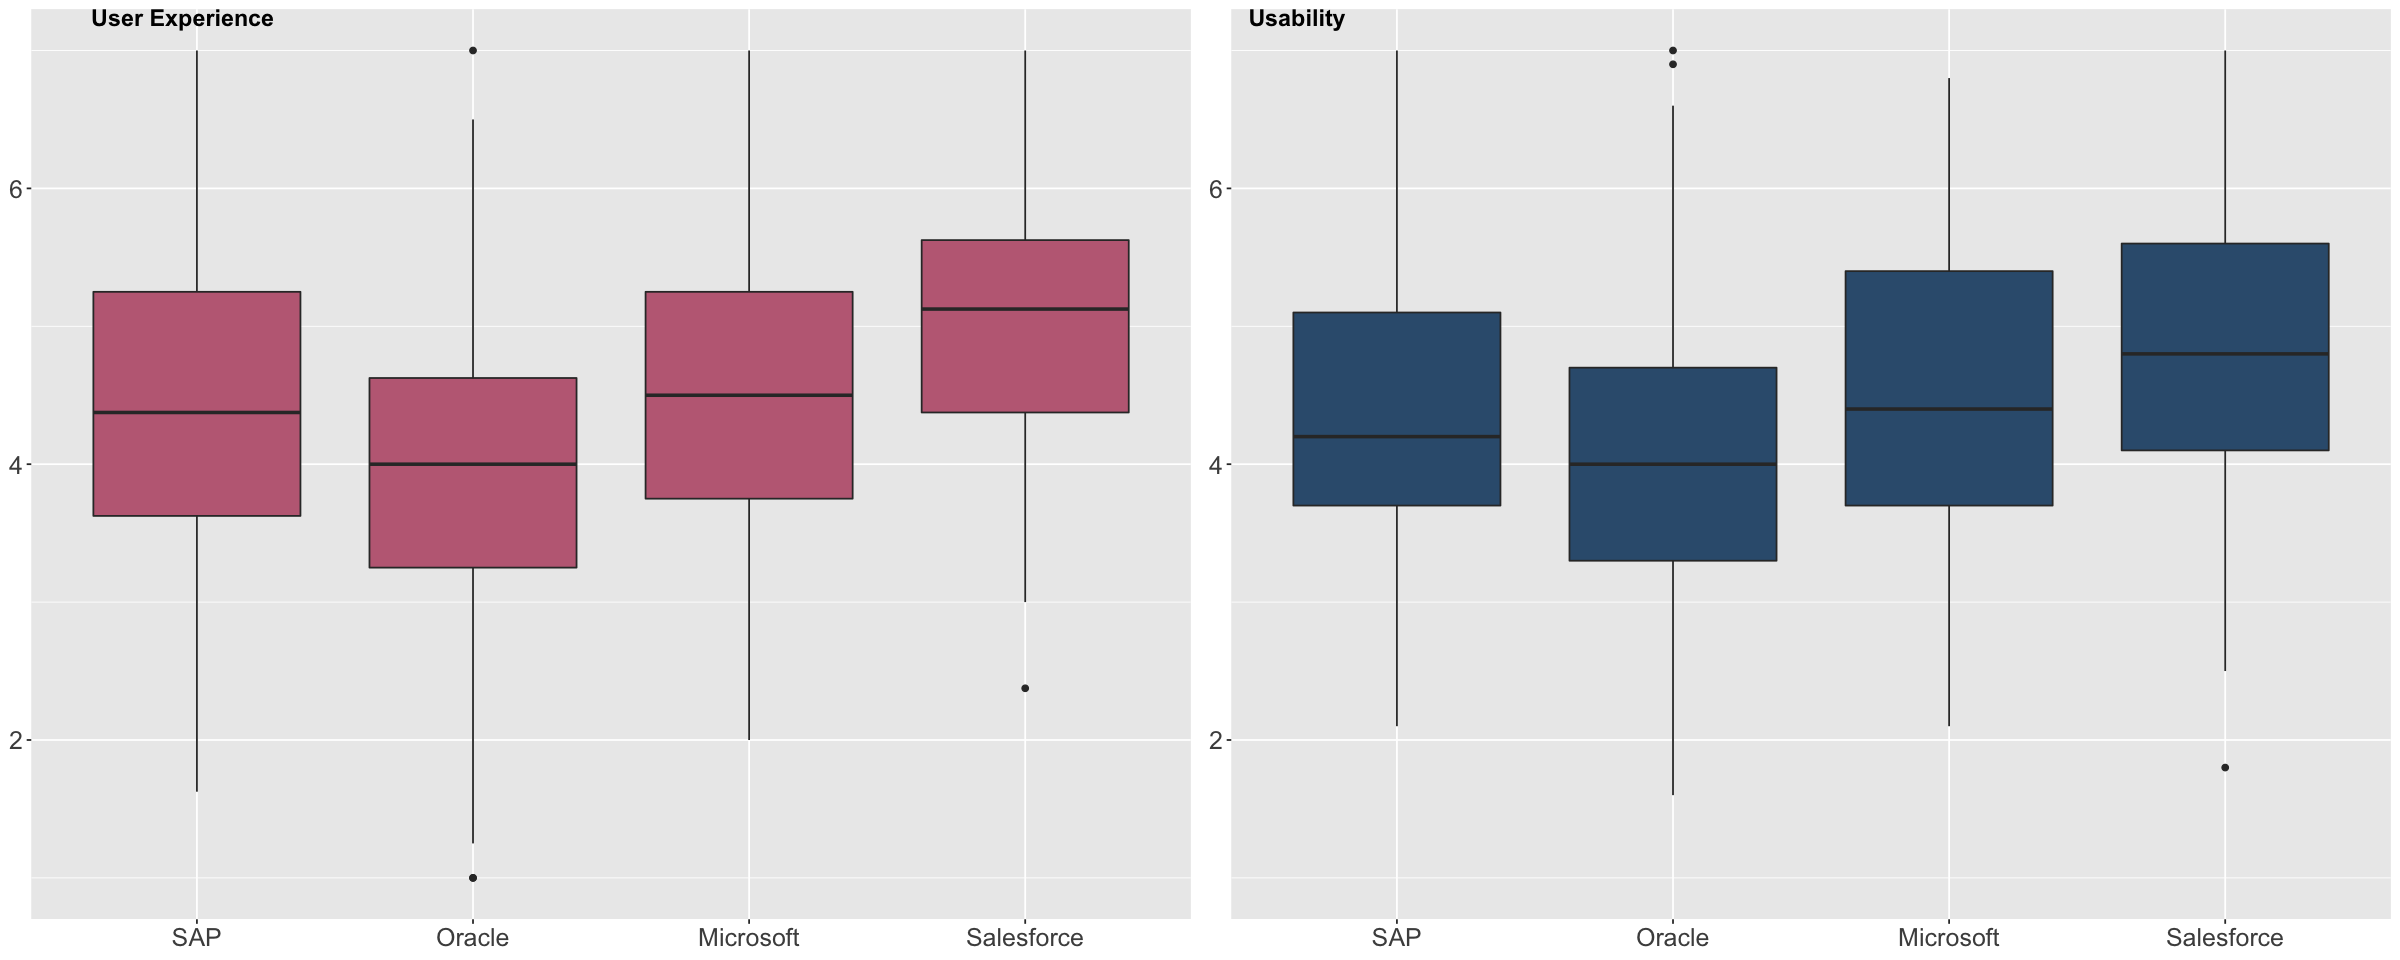

In [13]:
## set universal plot size:
options(repr.plot.width=20, repr.plot.height=8)

#create scatterplot of UX grouped by vendor
UXplot <- ggplot(data=dfUX.long, aes(x=Vendor, y=UX)) + geom_boxplot(fill="#C06C84") + 
          font("x.text", size = 15)+ 
          font("y.text", size = 15) + labs(x = NULL, y = NULL) + 
            coord_cartesian(ylim = c(1, 7))

#create scatterplot of SUS grouped by vendor
SUSplot <- ggplot(data=dfSUS.long, aes(x=Vendor, y=SUS)) + geom_boxplot(fill="#355C7D") + 
          font("x.text", size = 15)+ 
          font("y.text", size = 15) + labs(x = NULL, y = NULL) + 
            coord_cartesian(ylim = c(1, 7))

ggarrange(UXplot, SUSplot,
          labels = c("User Experience", "Usability"),
          ncol = 2, nrow = 1)

ggsave(filename = paste("barplots.png"), width = 25, height = 10, units = "cm")

In [53]:
sumUX <- ddply(dfUX.long, .(Vendor), summarize, mean=mean(UX), sd = sd(UX))
sumUX

Vendor,mean,sd
<fct>,<dbl>,<dbl>
SAP,4.4346,1.14446
Oracle,3.9060,1.11780
Microsoft,4.4862,1.05839
Salesforce,5.0310,0.92549


In [54]:
sumSUS <- ddply(dfSUS.long, .(Vendor), summarize, mean=mean(SUS), sd = sd(SUS))
sumSUS

Vendor,mean,sd
<fct>,<dbl>,<dbl>
SAP,4.3394,1.1180
Oracle,4.0633,1.0569
Microsoft,4.5450,1.1373
Salesforce,4.8239,1.0461


### 5. Run Repeated-Measures ANOVAs for Constructs of Interest
A) dfUX.long
B) dfSUS.long

#### 5.1 Assumption Checks

In [14]:
library(rstatix)


Attache Paket: ‘rstatix’


Die folgenden Objekte sind maskiert von ‘package:plyr’:

    desc, mutate


Das folgende Objekt ist maskiert ‘package:stats’:

    filter




In [15]:
# Outliers
dfUX.long %>%
    group_by(Vendor) %>%
    identify_outliers(UX)

Vendor,Antwort ID,SAPSUS,OracleSUS,MicrosoftSUS,SalesforceSUS,UX,is.outlier,is.extreme
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
Oracle,18,2.4,3.3,6.8,6.6,1.000,TRUE,FALSE
Oracle,38,5.8,1.7,2.9,5.9,1.000,TRUE,FALSE
Oracle,69,3.8,4.0,2.2,4.0,7.000,TRUE,FALSE
Salesforce,36,4.5,4.6,2.6,2.6,2.375,TRUE,FALSE


In [16]:
# Outliers
dfSUS.long %>%
    group_by(Vendor) %>%
    identify_outliers(SUS)

Vendor,Antwort ID,SAPUEQ,OracleUEQ,MicrosoftUEQ,SalesforceUEQ,SUS,is.outlier,is.extreme
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
Oracle,16,5.750,5.000,5.125,5.125,6.9,TRUE,FALSE
Oracle,70,3.875,4.375,2.625,4.750,7.0,TRUE,FALSE
Salesforce,46,3.750,3.250,3.375,3.000,1.8,TRUE,FALSE


In [17]:
# Normality Assumption
dfUX.long %>%
    group_by(Vendor) %>%
    shapiro_test(UX)
# Normality is provided, all p > .05

Vendor,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
SAP,UX,0.98611,0.32055
Oracle,UX,0.98817,0.45678
Microsoft,UX,0.99090,0.68318
Salesforce,UX,0.98901,0.52189


In [18]:
# Outliers
dfSUS.long %>%
    group_by(Vendor) %>%
    shapiro_test(SUS)
# Normality is provided, all p > .05

Vendor,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
SAP,SUS,0.98463,0.244495
Oracle,SUS,0.98575,0.300529
Microsoft,SUS,0.97873,0.078458
Salesforce,SUS,0.98424,0.227234


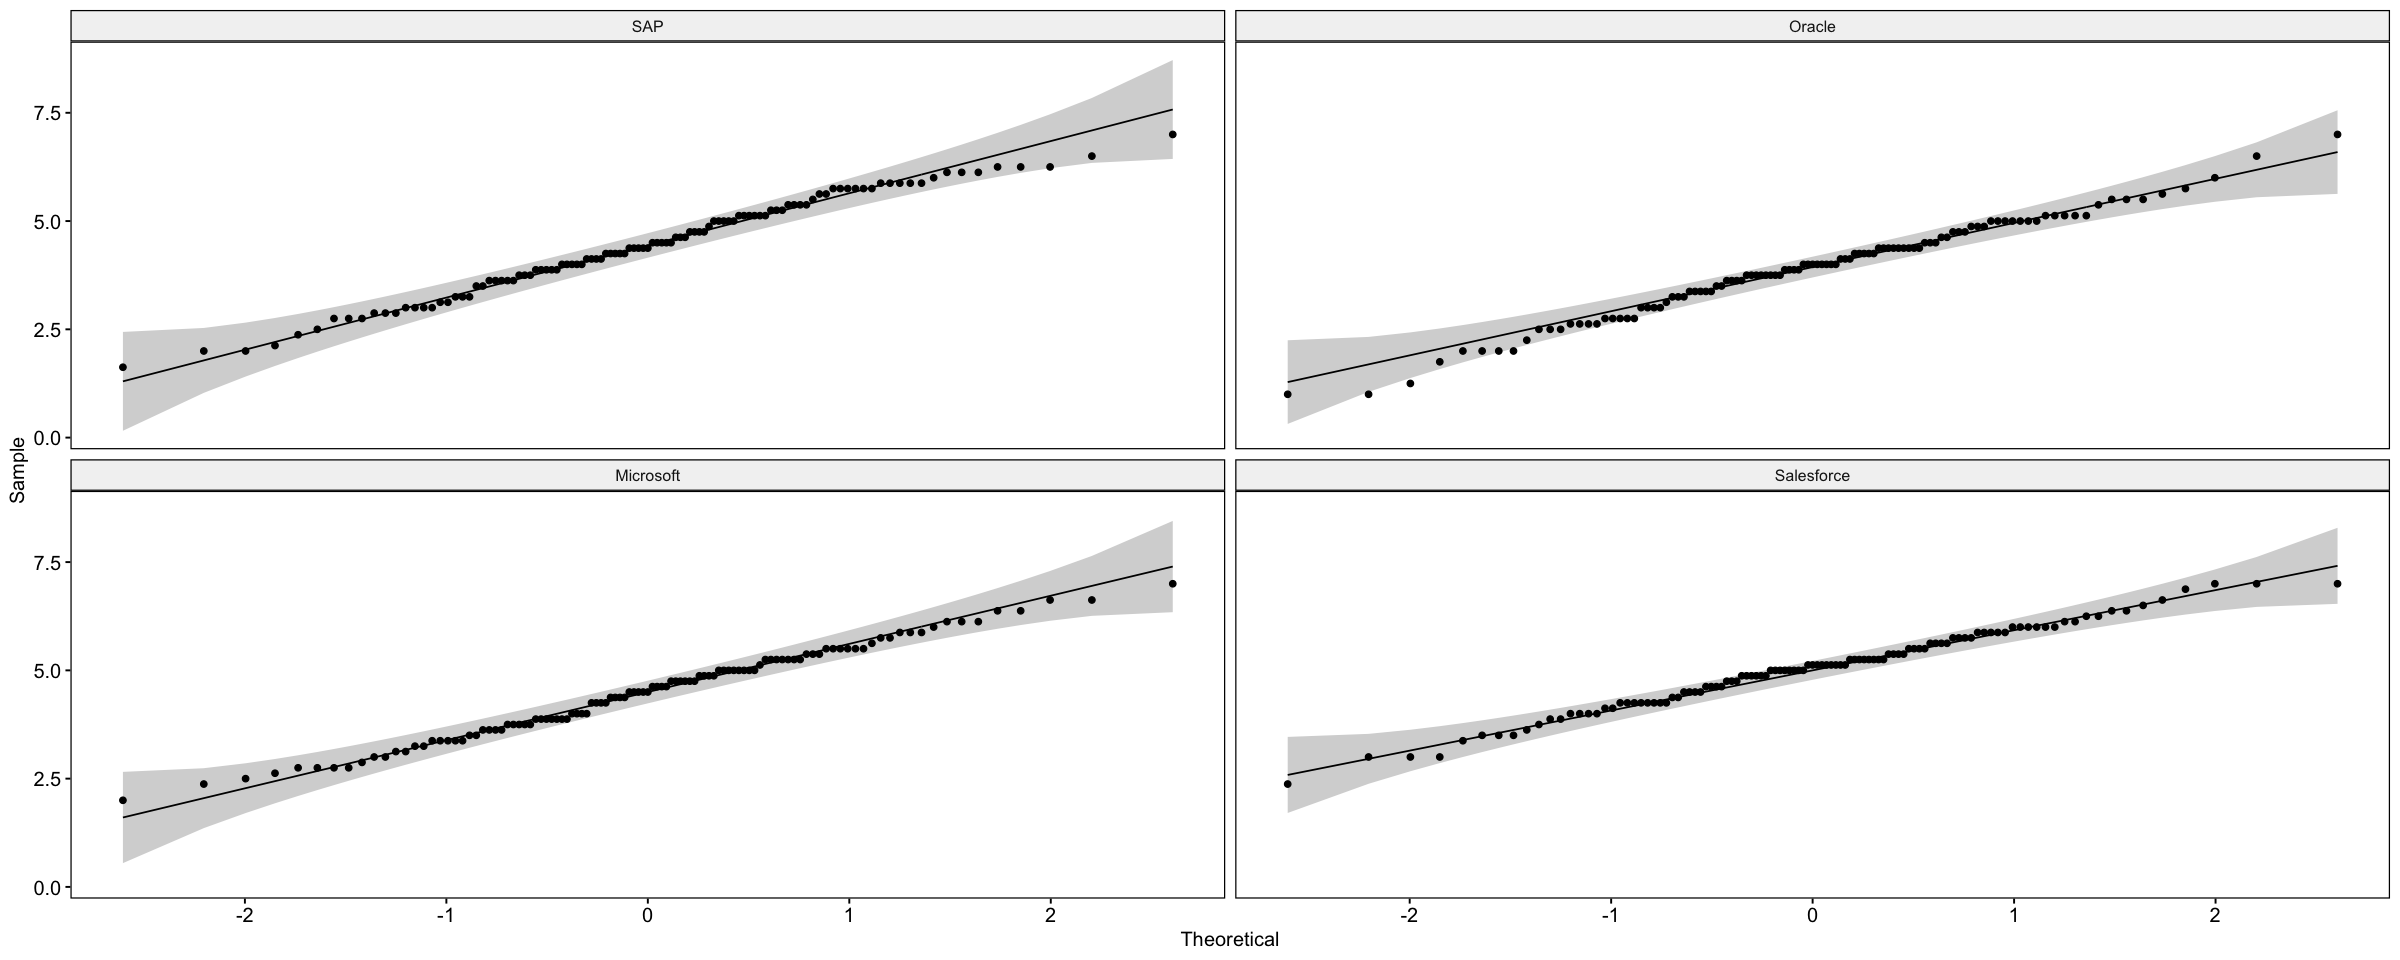

In [19]:
ggqqplot(dfUX.long, "UX", facet.by = "Vendor")

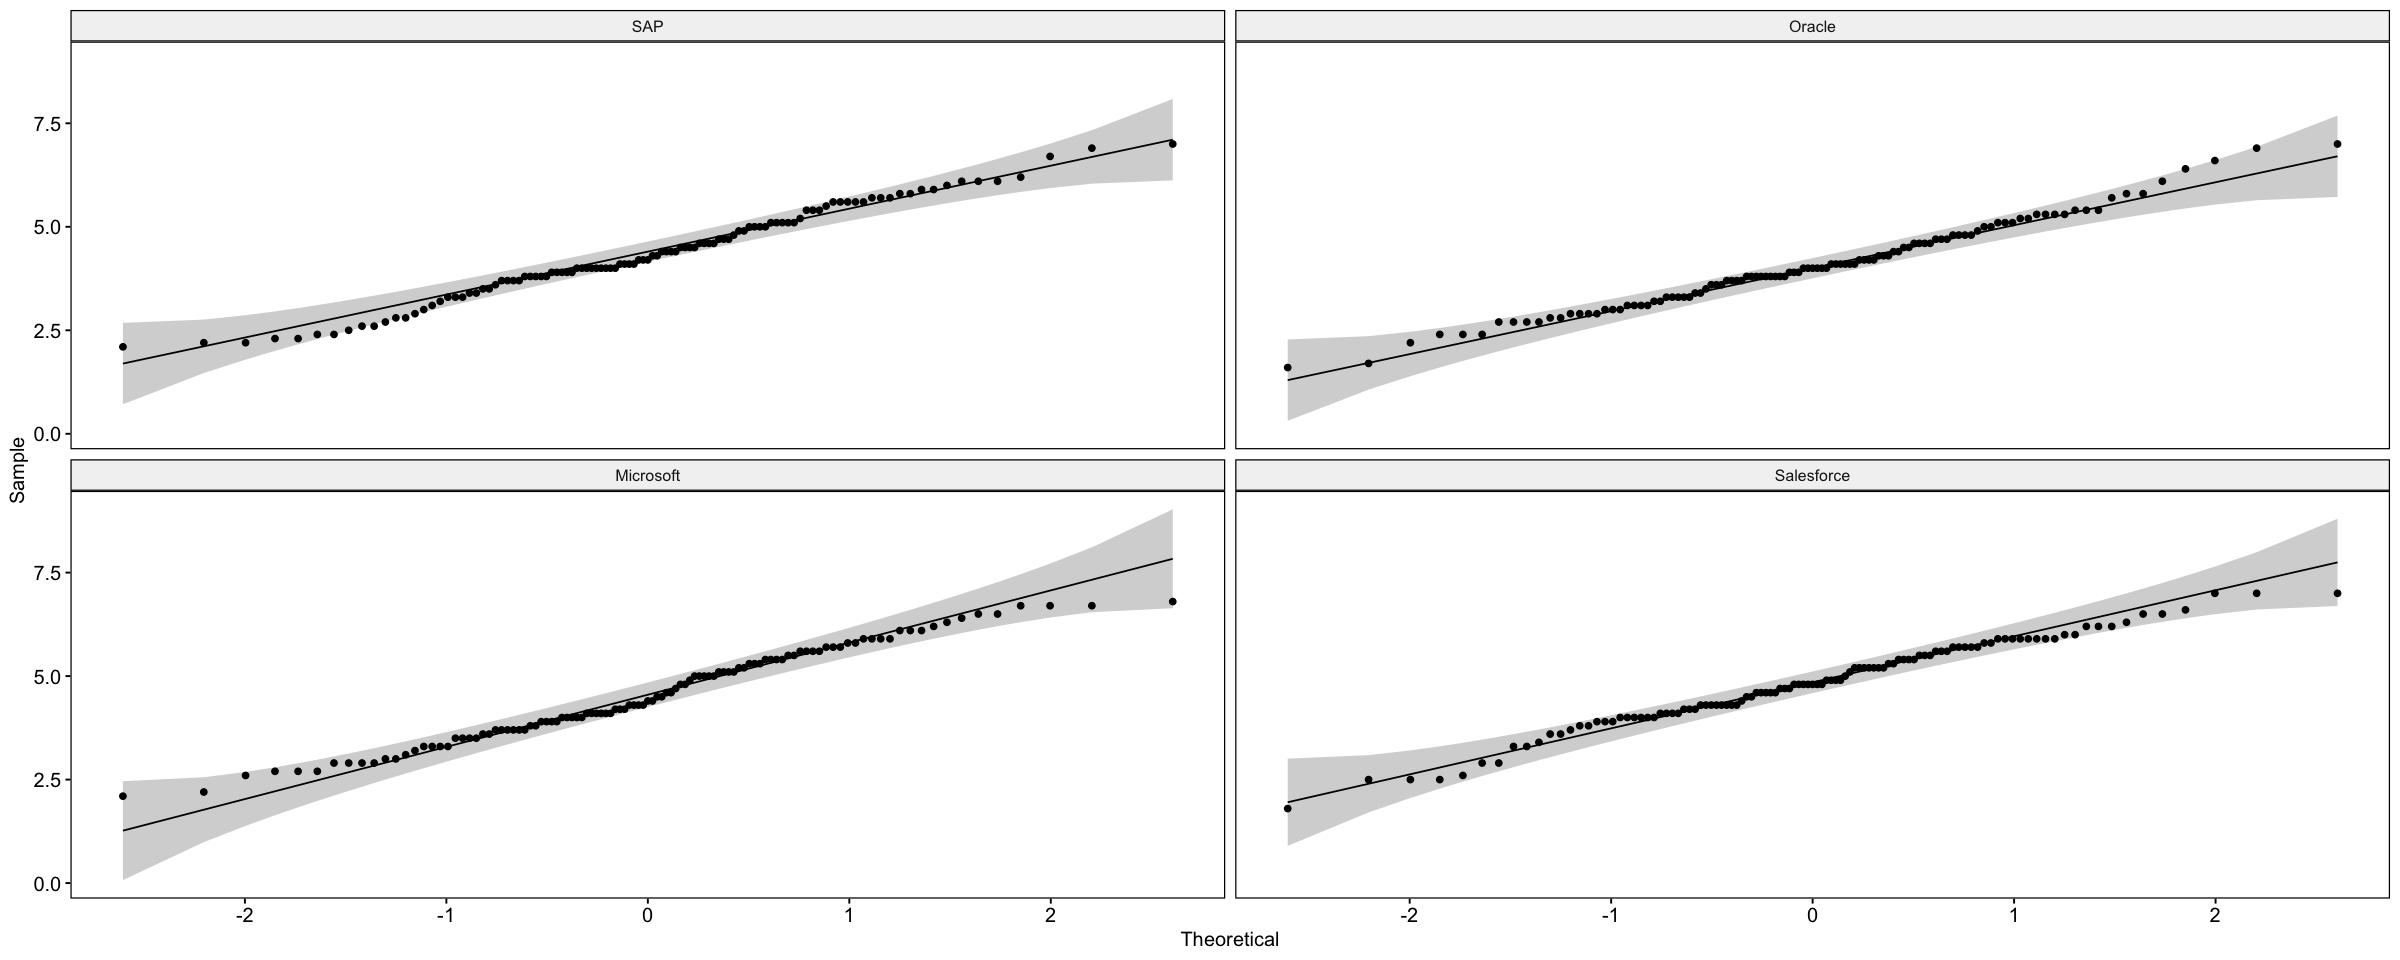

In [20]:
ggqqplot(dfSUS.long, "SUS", facet.by = "Vendor")

#### 5.2 Running the ANOVA for the UX Data

In [37]:
library(sjstats)
library(pwr)


UX.aov <- aov(
  UX ~ Vendor,
  data = dfUX.long
)

anova_stats(UX.aov)

,term,df,sumsq,meansq,statistic,p.value,etasq,partial.etasq,omegasq,partial.omegasq,epsilonsq,cohens.f,power
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Vendor,Vendor,3,69.129,23.043,20.32,0,0.124,0.124,0.117,0.117,0.118,0.376,1
...2,Residuals,432,489.883,1.134,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [43]:
summary(UX.aov)

             Df Sum Sq Mean Sq F value          Pr(>F)    
Vendor        3     69   23.04    20.3 0.0000000000025 ***
Residuals   432    490    1.13                            
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [41]:
# pairwise comparisons
UX.pwc <- dfUX.long %>%
  pairwise_t_test(
    UX ~ Vendor, paired = TRUE,
    p.adjust.method = "holm", 
    )
UX.pwc

,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,UX,SAP,Oracle,109,109,3.83343,108,0.000213000000000,0.0004260000000,***
2,UX,SAP,Microsoft,109,109,-0.40948,108,0.683000000000000,0.6830000000000,ns
3,UX,SAP,Salesforce,109,109,-4.65554,108,0.000009240000000,0.0000370000000,****
4,UX,Oracle,Microsoft,109,109,-4.51929,108,0.000015900000000,0.0000477000000,****
5,UX,Oracle,Salesforce,109,109,-8.32632,108,0.000000000000284,0.0000000000017,****
6,UX,Microsoft,Salesforce,109,109,-5.21660,108,0.000000887000000,0.0000044400000,****


#### 5.3 Running the ANOVA for the SUS Data

In [55]:
SUS.aov <- aov(
  SUS ~ Vendor,
  data = dfSUS.long
)

anova_stats(SUS.aov)

,term,df,sumsq,meansq,statistic,p.value,etasq,partial.etasq,omegasq,partial.omegasq,epsilonsq,cohens.f,power
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Vendor,Vendor,3,33.827,11.276,9.486,0,0.062,0.062,0.055,0.055,0.055,0.257,0.997
...2,Residuals,432,513.521,1.189,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [56]:
# pairwise comparisons
SUS.pwc <- dfSUS.long %>%
  pairwise_t_test(
    SUS ~ Vendor, paired = TRUE,
    p.adjust.method = "holm", 
    )
SUS.pwc

,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,SUS,SAP,Oracle,109,109,2.0906,108,0.0390000000,0.11700000,ns
2,SUS,SAP,Microsoft,109,109,-1.5017,108,0.1360000000,0.13600000,ns
3,SUS,SAP,Salesforce,109,109,-3.4758,108,0.0007350000,0.00300000,**
4,SUS,Oracle,Microsoft,109,109,-3.8450,108,0.0002040000,0.00100000,**
5,SUS,Oracle,Salesforce,109,109,-5.8367,108,0.0000000566,0.00000034,****
6,SUS,Microsoft,Salesforce,109,109,-2.0438,108,0.0430000000,0.11700000,ns
